In [30]:
import sys

from pyannote.core import Annotation
from pyannote.database.util import load_rttm

sys.path.append("../")
from diarization import apply_diarization_pipeline


In [31]:
ch1_netfrix = load_rttm("../output/ch1-netfrix.rttm")
ch2_nitzan_hadar = load_rttm("../output/ch2-nitzan-hadar.rttm")
ch3_roi = load_rttm("../output/ch3-roi.rttm")

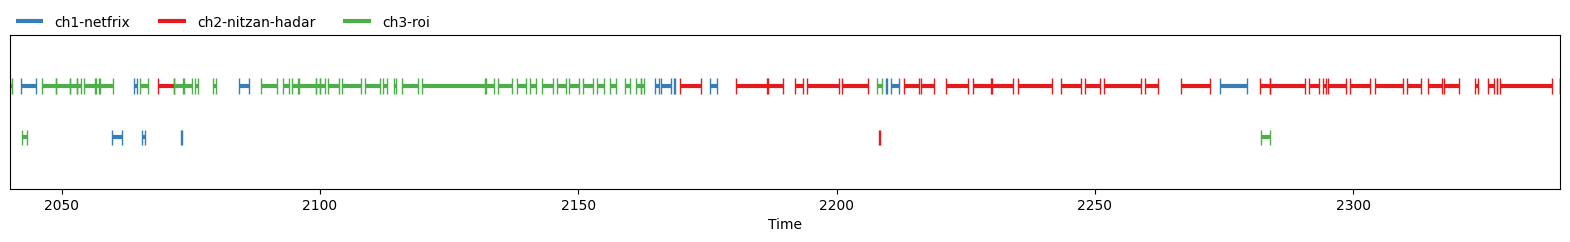

In [43]:
annotation = Annotation(uri="netfrix")
annotation.update(ch1_netfrix["ch1-netfrix"])
annotation.update(ch2_nitzan_hadar["ch2-nitzan-hadar"])
annotation.update(ch3_roi["ch3-roi"])
# notebook.reset()
annotation
# seg = Segment(2040, 2340)
# a = annotation.crop(seg)
# notebook.crop = seg
# a

In [33]:
hypothesis = apply_diarization_pipeline("../data/mixed.mp3")

2025-05-25 10:42:15.363 | DEBUG    | diarization:apply_diarization_pipeline:26 - Processing ../data/mixed.mp3 on cpu
/homes/noamgo/work/uv_games/diarization/.venv/lib/python3.12/site-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1839.)
  std = sequences.std(dim=-1, correction=1)


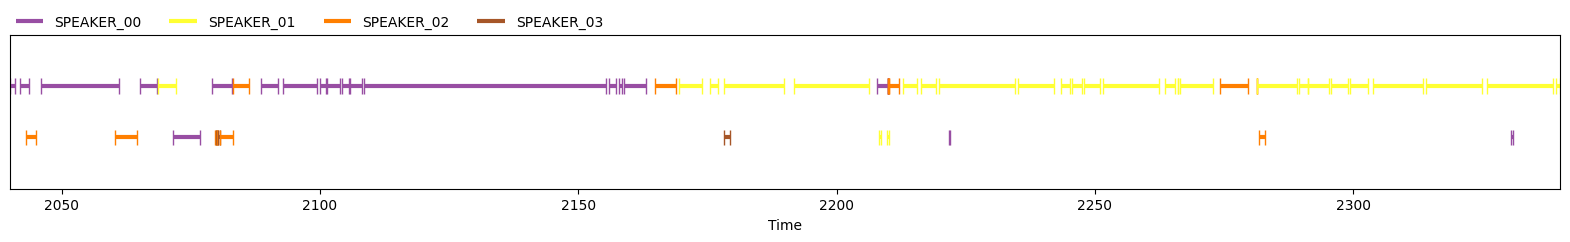

In [46]:
hypothesis

In [42]:
from pathlib import Path

hypothesis.uri = "netfrix"
Path("../output/hypothesis.rttm").write_text(hypothesis.to_rttm())

26029

In [47]:
from pyannote.metrics.diarization import DiarizationErrorRate

metric = DiarizationErrorRate()
der = metric(annotation, hypothesis, detailed=True  )
der

/homes/noamgo/work/uv_games/diarization/.venv/lib/python3.12/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


{'correct': 1801.683999999995,
 'missed detection': 27.96321875000066,
 'confusion': 11.431781250002771,
 'false alarm': 549.7892187499962,
 'total': 1841.0789999999981,
 'diarization error rate': 0.32002114996151726}

In [45]:
report = metric.report(display=True)

        diarization error rate   total correct correct false alarm false alarm missed detection missed detection confusion confusion
                             %                       %                       %                                 %                   %
item                                                                                                                                
netfrix                  32.00 1841.08 1801.68   97.86      549.79       29.86            27.96             1.52     11.43      0.62
TOTAL                    32.00 1841.08 1801.68   97.86      549.79       29.86            27.96             1.52     11.43      0.62
